<h1>Project: Analysis of Groundhog Day and its Relationship with Temperatures</h1>

This project will evaluate whether Punxsutawney Phil's prediction of early or late spring arrival is related to average temperatures in February and March across regions of the U.S. We will use Python for data analysis and visualization with Matplotlib and Seaborn, and build a dashboard in Tableau.

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold,train_test_split
from sklearn.metrics import f1_score,r2_score,accuracy_score,mean_squared_error,precision_score, recall_score, roc_auc_score, classification_report,confusion_matrix

In [4]:
data=pd.read_csv("archive.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Year                                         132 non-null    object 
 1   Punxsutawney Phil                            131 non-null    object 
 2   February Average Temperature                 123 non-null    float64
 3   February Average Temperature (Northeast)     123 non-null    float64
 4   February Average Temperature (Midwest)       123 non-null    float64
 5   February Average Temperature (Pennsylvania)  123 non-null    float64
 6   March Average Temperature                    123 non-null    float64
 7   March Average Temperature (Northeast)        123 non-null    float64
 8   March Average Temperature (Midwest)          123 non-null    float64
 9   March Average Temperature (Pennsylvania)     123 non-null    float64
dtypes:

In [6]:
data.head()

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1886,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1887,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1888,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1890,No Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.describe()

,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.00000,123.00000
mean,33.802846,22.691870,32.695935,26.522764,41.697398,32.367480,42.56748,35.90813
std,3.269379,4.265619,4.843881,4.512293,2.936268,3.873586,4.49290,4.19167
min,25.230000,10.400000,20.300000,15.200000,35.440000,24.200000,28.50000,24.50000
25%,31.785000,20.050000,29.650000,23.600000,39.390000,29.700000,39.15000,33.00000
50%,33.690000,22.900000,33.100000,26.900000,41.790000,32.500000,42.80000,35.90000
75%,36.005000,25.950000,36.300000,29.800000,43.560000,34.800000,45.60000,38.50000
max,41.410000,31.600000,41.400000,35.800000,50.410000,43.400000,56.30000,47.70000


The dataset consists of 10 columns and 132 records, with one entry per year from 1886 to 2016. It includes reports on the average temperature for the months of February and March, as well as the average temperatures in different regions during these months.

In [9]:
data.isna().sum()

Year                                           0
Punxsutawney Phil                              1
February Average Temperature                   9
February Average Temperature (Northeast)       9
February Average Temperature (Midwest)         9
February Average Temperature (Pennsylvania)    9
March Average Temperature                      9
March Average Temperature (Northeast)          9
March Average Temperature (Midwest)            9
March Average Temperature (Pennsylvania)       9
dtype: int64

In [10]:
FAT_mean=data['February Average Temperature'].mean()
FATN_mean=data['February Average Temperature (Northeast)'].mean()
FATM_mean=data['February Average Temperature (Midwest)'].mean()
FATP_mean=data['February Average Temperature (Pennsylvania)'].mean()

MATP_mean=data['March Average Temperature'].mean()
MATPN_mean=data['March Average Temperature (Northeast)'].mean()
MATPM_mean=data['March Average Temperature (Midwest)'].mean()
MATPP_mean=data['March Average Temperature (Pennsylvania)'].mean()


In [11]:
data['February Average Temperature'].fillna(FAT_mean, inplace=True)
data['February Average Temperature (Northeast)'].fillna(FATN_mean, inplace=True)
data['February Average Temperature (Midwest)'].fillna(FATM_mean, inplace=True)
data['February Average Temperature (Pennsylvania)'].fillna(FATP_mean, inplace=True)

data['March Average Temperature'].fillna(MATP_mean, inplace=True)
data['March Average Temperature (Northeast)'].fillna(MATPN_mean, inplace=True)
data['March Average Temperature (Midwest)'].fillna(MATPM_mean, inplace=True)
data['March Average Temperature (Pennsylvania)'].fillna(MATPP_mean, inplace=True)

data = data.dropna(subset=["Punxsutawney Phil"])

In [12]:
data['February Average Temperature']=data['February Average Temperature'].round(2)
data['February Average Temperature (Northeast)']=data['February Average Temperature (Northeast)'].round(2)
data['February Average Temperature (Midwest)']=data['February Average Temperature (Midwest)'].round(2)
data['February Average Temperature (Pennsylvania)']=data['February Average Temperature (Pennsylvania)'].round(2)

data['March Average Temperature']=data['March Average Temperature'].round(2)
data['March Average Temperature (Northeast)']=data['March Average Temperature (Northeast)'].round(2)
data['March Average Temperature (Midwest)']=data['March Average Temperature (Midwest)'].round(2)
data['March Average Temperature (Pennsylvania)']=data['March Average Temperature (Pennsylvania)'].round(2)

In [13]:
data["Year"] = data["Year"].astype(str).str[:4].astype(int)

9 missing values ​​have been identified in the temperature columns, representing 7% of the total data. To clean the dataset and continue with the analysis, these empty values ​​will be replaced by the average temperature of each column.

In [15]:
data.isna().sum()

Year                                           0
Punxsutawney Phil                              0
February Average Temperature                   0
February Average Temperature (Northeast)       0
February Average Temperature (Midwest)         0
February Average Temperature (Pennsylvania)    0
March Average Temperature                      0
March Average Temperature (Northeast)          0
March Average Temperature (Midwest)            0
March Average Temperature (Pennsylvania)       0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Year                                         131 non-null    int32  
 1   Punxsutawney Phil                            131 non-null    object 
 2   February Average Temperature                 131 non-null    float64
 3   February Average Temperature (Northeast)     131 non-null    float64
 4   February Average Temperature (Midwest)       131 non-null    float64
 5   February Average Temperature (Pennsylvania)  131 non-null    float64
 6   March Average Temperature                    131 non-null    float64
 7   March Average Temperature (Northeast)        131 non-null    float64
 8   March Average Temperature (Midwest)          131 non-null    float64
 9   March Average Temperature (Pennsylvania)     131 non-null    float64
dtypes: floa

In [17]:
data.sample(5)

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
55,1941,Full Shadow,33.53,22.00,29.4,23.60,39.20,26.70,36.80,28.90
45,1931,Full Shadow,37.94,24.20,38.0,29.00,39.42,32.90,37.70,33.70
87,1973,Full Shadow,33.58,21.80,32.7,25.50,44.29,39.20,49.60,42.90
7,1893,No Record,33.80,22.69,32.7,26.52,41.70,32.37,42.57,35.91
101,1987,Full Shadow,37.38,21.80,36.9,26.80,42.57,35.50,45.80,39.00


In [18]:
data.isnull().sum()

Year                                           0
Punxsutawney Phil                              0
February Average Temperature                   0
February Average Temperature (Northeast)       0
February Average Temperature (Midwest)         0
February Average Temperature (Pennsylvania)    0
March Average Temperature                      0
March Average Temperature (Northeast)          0
March Average Temperature (Midwest)            0
March Average Temperature (Pennsylvania)       0
dtype: int64

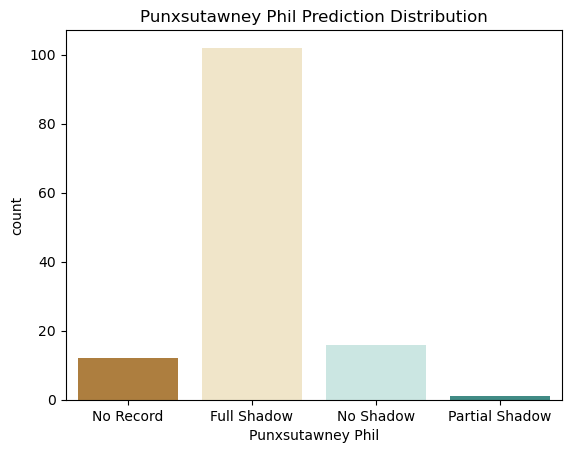

In [19]:
sns.countplot(x="Punxsutawney Phil", data=data, palette='BrBG')
plt.title("Punxsutawney Phil Prediction Distribution")
plt.show()

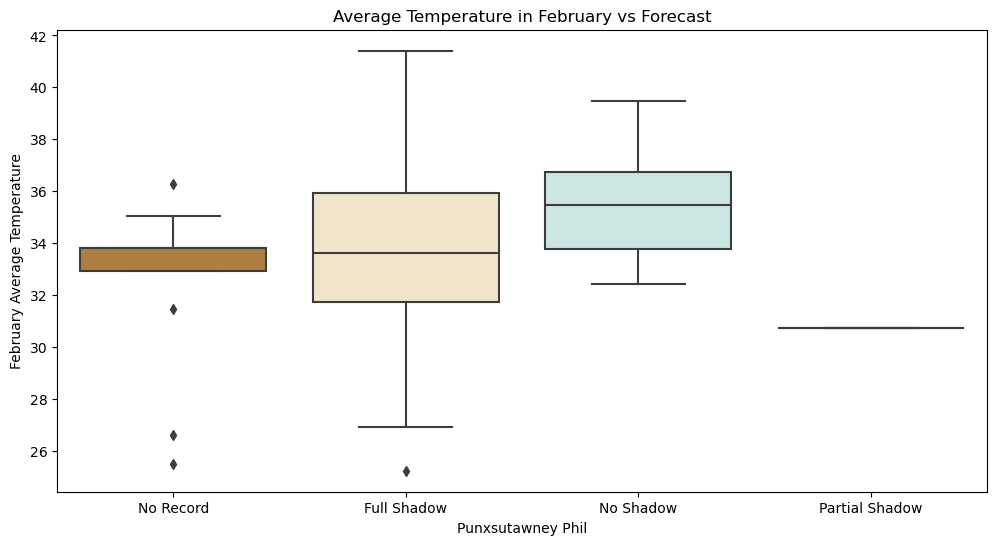

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Punxsutawney Phil", y="February Average Temperature", data=data, palette='BrBG')
plt.title("Average Temperature in February vs Forecast")
plt.show()

**Median Comparison:**

<li> The "No Shadow" category has the highest average temperature, with a higher median than the other categories.</li>
<li>"Full Shadow" has a lower median, suggesting that when Phil sees his shadow, February tends to be cooler.</li>
<li>"No Record" has a median in the middle range, with less spread in the data.</li>
<li>"Partial Shadow" has only one recorded value, so a meaningful comparison cannot be made.</li>

**Scatter and Outliers:**

<li>The "Full Shadow" category shows a large variability in temperature, with some cold and warm outliers.</li>
<li>"No Record" has less scatter, but also features cold outliers.</li>
<li>"No Shadow" has a more compact distribution, suggesting less variability in temperatures when Phil does not see his shadow</li>

Following Groundhog Day logic, when Phil sees his shadow ("Full Shadow"), there will supposedly be more winter, which coincides with a lower median.
However, the high scatter in "Full Shadow" suggests that the relationship is not entirely consistent.
The "No Shadow" prediction is associated with warmer temperatures, which may support the idea of ​​an early spring.

**Conclusion:** There is some correlation between Phil's prediction and temperature, but the variability in "Full Shadow" indicates that other factors are at play. Further statistical analysis (such as hypothesis testing or regression) could be done to determine whether the relationship is significant.

C:\Users\laura\AppData\Local\Temp\ipykernel_22936\377180317.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Year", y="February Average Temperature", data=data, label="Febrero", palette='BrBG')
C:\Users\laura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laura\AppData\Local\Temp\ipykernel_22936\377180317.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Year", y="March Average Temperature", data=data, label="Marzo

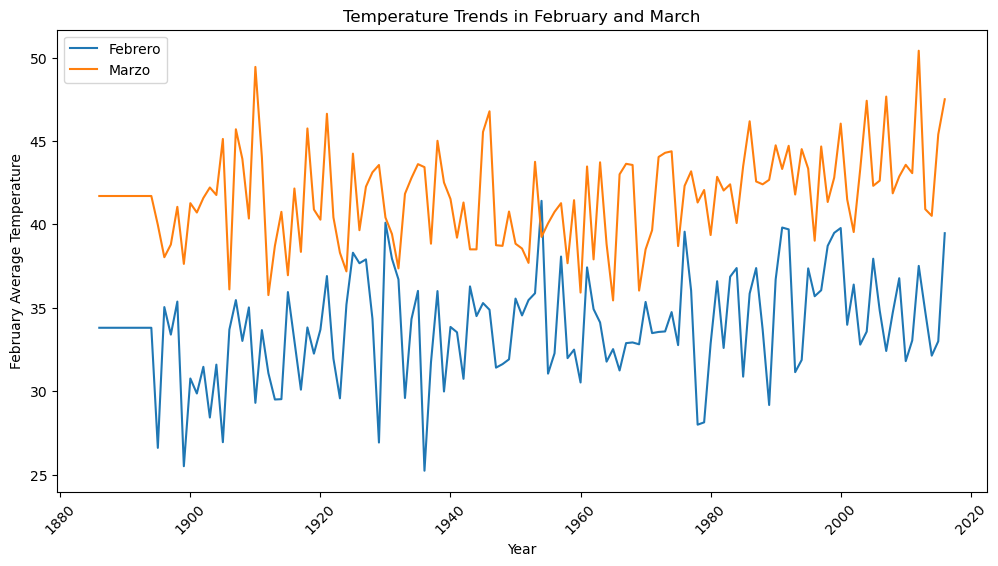

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="February Average Temperature", data=data, label="Febrero", palette='BrBG')
sns.lineplot(x="Year", y="March Average Temperature", data=data, label="Marzo", palette='BrBG')
plt.legend()
plt.title("Temperature Trends in February and March")
plt.xticks(rotation=45) 
plt.show()

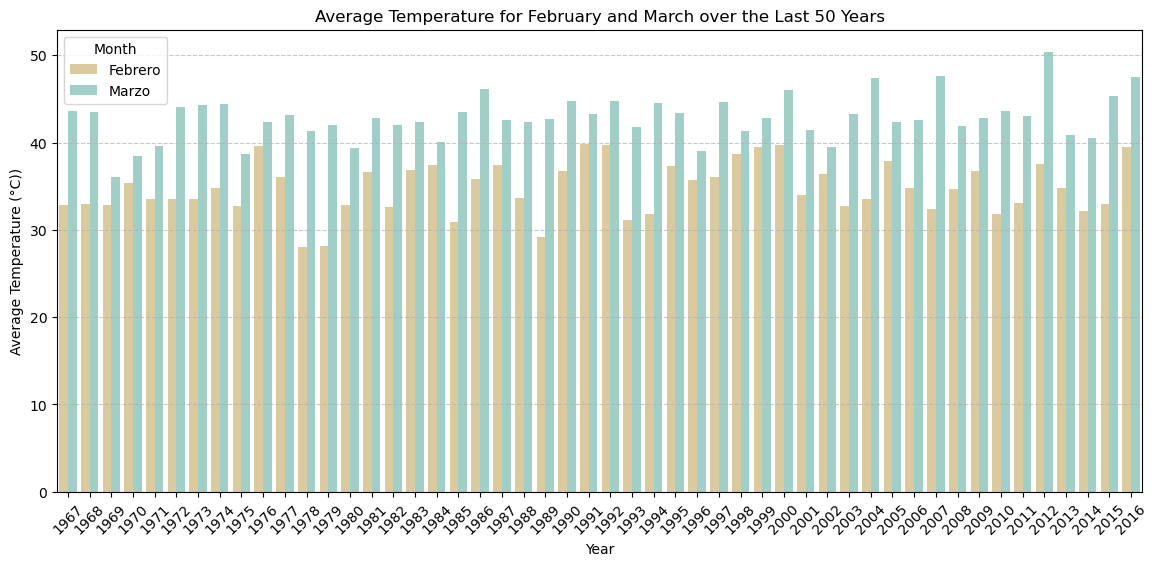

In [23]:
plt.figure(figsize=(14,6))

# Filtrar los últimos 50 años
data_filtered = data[data["Year"] >= (data["Year"].max() - 49)]

# Transformar el DataFrame para facilitar la gráfica de barras agrupadas
data_melted = data_filtered.melt(id_vars=["Year"], 
                        value_vars=["February Average Temperature", "March Average Temperature"],
                        var_name="Mes", value_name="Temperatura")

# Reemplazar nombres para mejor legibilidad
data_melted["Mes"] = data_melted["Mes"].replace({
    "February Average Temperature": "Febrero",
    "March Average Temperature": "Marzo"
})

# Crear el gráfico de barras agrupadas
sns.barplot(x="Year", y="Temperatura", hue="Mes", data=data_melted, palette="BrBG")

# Personalización del gráfico
plt.title("Average Temperature for February and March over the Last 50 Years")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C))")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
plt.legend(title="Month")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [24]:
data.sample(5)

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
32,1918,Full Shadow,33.82,19.8,34.1,25.7,45.75,32.9,48.2,39.3
87,1973,Full Shadow,33.58,21.8,32.7,25.5,44.29,39.2,49.6,42.9
53,1939,Full Shadow,29.98,24.9,34.0,30.2,42.51,29.3,44.4,35.6
99,1985,Full Shadow,30.87,24.8,28.4,27.1,43.48,34.5,46.3,38.3
114,2000,Full Shadow,39.78,27.2,40.1,31.6,46.04,39.1,47.7,42.6


<h3>Machine Learning Modeling: Predicting Punxsutawney Phil</h3>
In this section, we will build a machine learning model that predicts Punxsutawney Phil's prediction ("Early Spring" or "Six More Weeks of Winter") based on past temperatures.

In [26]:
mapping = {
    "Full Shadow": 0,        
    "Partial Shadow": 0,     
    "No Shadow": 1,          
}

data["Phil_Prediction"] = data["Punxsutawney Phil"].map(mapping)

# Handling "No Record" values ​​by assigning NaN
data["Phil_Prediction"] = pd.to_numeric(data["Phil_Prediction"], errors='coerce')

data = data.dropna(subset=["Phil_Prediction"])

In [27]:
print(data["Phil_Prediction"].isna().sum())

0


In [28]:
data.head()
data.to_csv('Analysis_of_Groundhog_Day.csv', index=False)

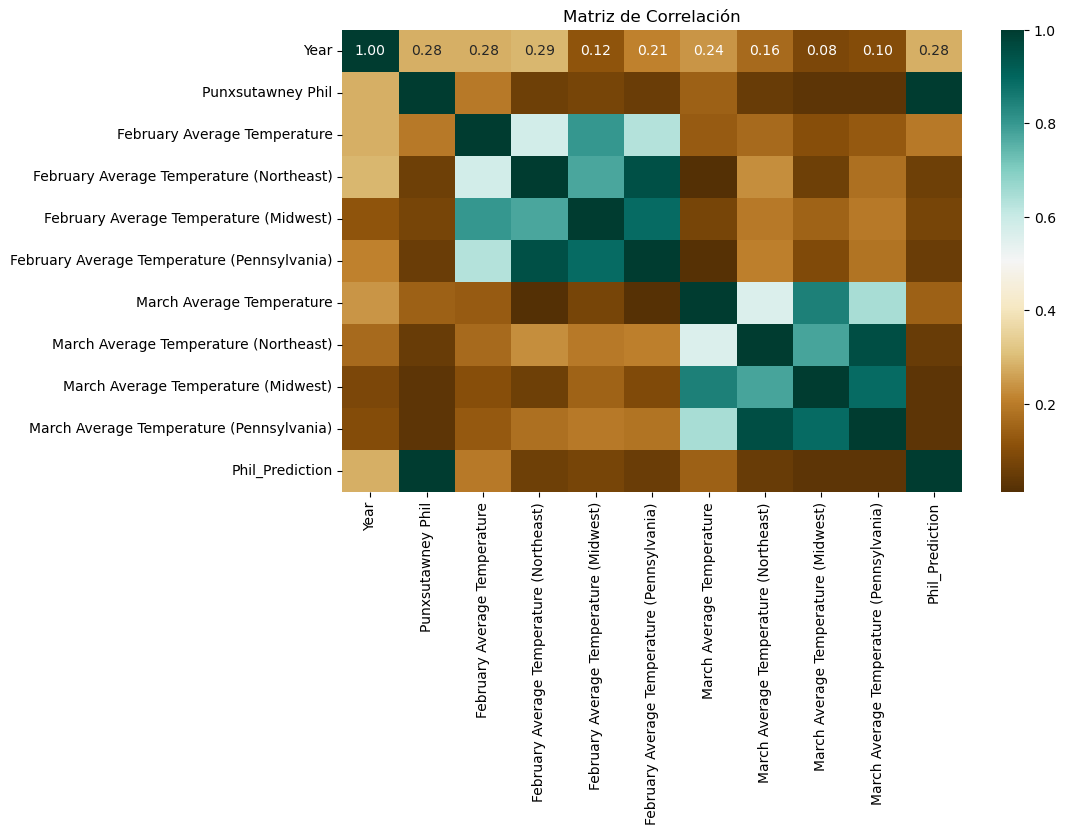

In [29]:
data["Punxsutawney Phil"] = data["Punxsutawney Phil"].map({ "Full Shadow": 0,"Partial Shadow": 0,"No Shadow": 1})

# Matriz de correlación
corr = data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='BrBG', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

**Relationships between temperatures:**
The average temperatures for February and March in different regions have a high correlation with each other (seen in the lighter colors and values ​​close to 1). This indicates that temperatures in different areas vary in a similar way.

**Correlation with "Phil_Prediction":**
The variable Phil_Prediction (Punxsutawney Phil's prediction) does not seem to have a strong correlation with temperatures in general. The values ​​in its row/column are relatively low, suggesting that the groundhog's prediction has no direct relationship with recorded temperatures.

**Trends over time (Year):**
The Year column shows moderate correlations with some temperature variables, which could suggest a temporal trend in temperatures over the years (possible indication of climate change).

**Low correlation zones:**
Some combinations of variables are darker in color, indicating low correlation. These may represent factors that are not directly related to each other.


This analysis suggests that February and March temperatures in different regions are strongly correlated with each other, but Phil's prediction does not seem to be directly influenced by the average temperature. A next step might be to perform a trend analysis to see how groundhog predictions have changed over time and if there are any hidden patterns in the relationship between prediction and temperatures.

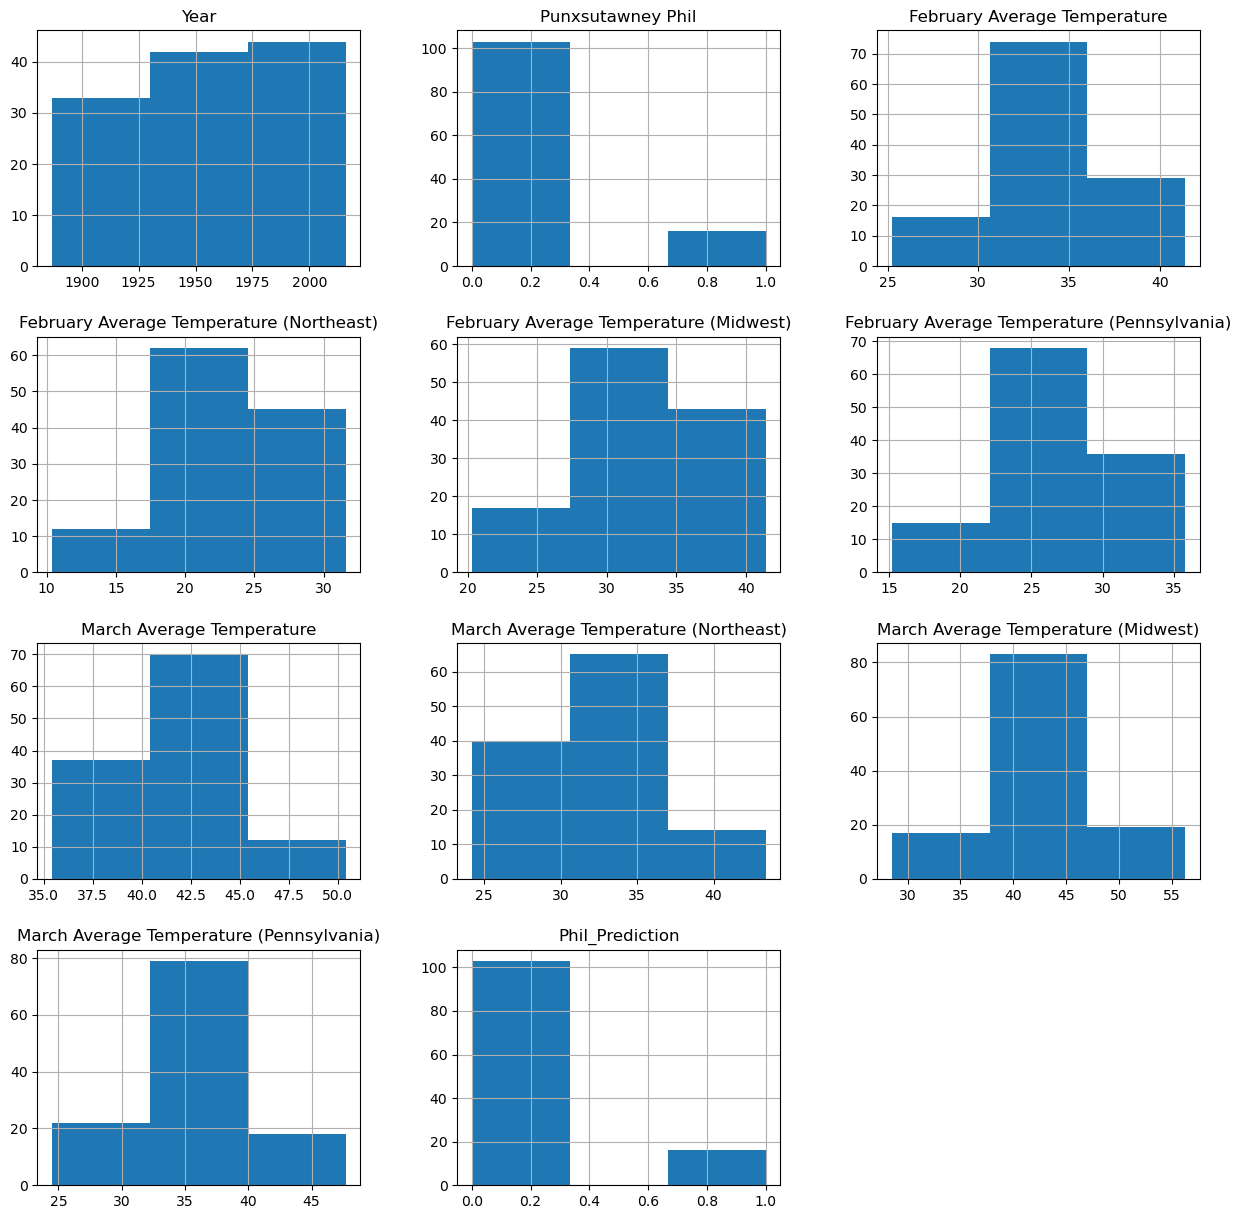

In [31]:
hist = data.hist(bins=3,figsize=(15, 15))

In [32]:
target=data["Phil_Prediction"]
features = data.drop(['Phil_Prediction','Punxsutawney Phil'], axis=1)

Since the target variable is unbalanced we are using SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic examples of the minority class to balance the classes.

Phil_Prediction
0.0    103
1.0    103
Name: count, dtype: int64


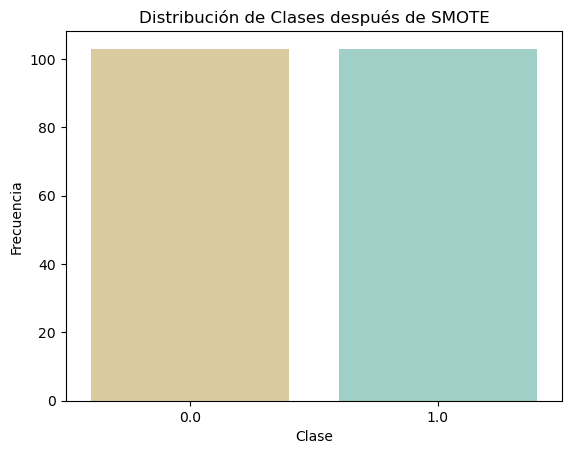

In [34]:
# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
features_resampled,target_resampled = smote.fit_resample(features, target)

# Crear un nuevo DataFrame balanceado
data_balanced = pd.concat([pd.DataFrame(features_resampled, columns=features.columns), pd.DataFrame(target_resampled, columns=["Phil_Prediction"])], axis=1)

# Verificar el balance de clases
print(target_resampled.value_counts())

# Opcional: Mostrar gráfico de distribución de clases después del balanceo

sns.countplot(x=target_resampled, palette='BrBG')
plt.title("Distribución de Clases después de SMOTE")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

In [35]:
features_train, features_valid, target_train, target_valid = train_test_split(features_resampled,target_resampled, test_size=0.25, random_state=12345)

print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)

(154, 9)
(154,)
(52, 9)
(52,)


In [36]:
# Inicializar el modelo
RandomForest_model = RandomForestClassifier(random_state=534,n_estimators=17)
RandomForest_model.fit(features_train, target_train)

# Predicciones
predicted_valid = RandomForest_model.predict(features_valid)


# Calcular las métricas
accuracy = accuracy_score(target_valid, predicted_valid)
precision = precision_score(target_valid, predicted_valid)
recall = recall_score(target_valid, predicted_valid)
f1 = f1_score(target_valid, predicted_valid)
auc_roc = roc_auc_score(target_valid, predicted_valid)
conf_matrix = confusion_matrix(target_valid, predicted_valid)

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8269
Precision: 0.8148
Recall: 0.8462
F1-Score: 0.8302
AUC-ROC: 0.8269
Confusion Matrix:
[[21  5]
 [ 4 22]]


In [37]:
model_DT = DecisionTreeClassifier(random_state=12345)
model_DT.fit(features_train,target_train)
predicted_valid_DT = model_DT.predict(features_valid)

# Calcular las métricas
accuracy = accuracy_score(target_valid, predicted_valid_DT)
precision = precision_score(target_valid, predicted_valid_DT)
recall = recall_score(target_valid, predicted_valid_DT)
f1 = f1_score(target_valid, predicted_valid_DT)
auc_roc = roc_auc_score(target_valid, predicted_valid_DT)
conf_matrix = confusion_matrix(target_valid, predicted_valid_DT)

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8462
Precision: 0.8000
Recall: 0.9231
F1-Score: 0.8571
AUC-ROC: 0.8462
Confusion Matrix:
[[20  6]
 [ 2 24]]


In [38]:
# Entrenar el modelo XGBoost
model_XGB = xgb.XGBClassifier(random_state=12345, scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss')
model_XGB.fit(features_train,target_train)

# Predecir en el conjunto de validación
predicted_valid_XGB = model_XGB.predict(features_valid)

# Calcular las métricas
accuracy = accuracy_score(target_valid, predicted_valid_XGB)
precision = precision_score(target_valid, predicted_valid_XGB)
recall = recall_score(target_valid, predicted_valid_XGB)
f1 = f1_score(target_valid, predicted_valid_XGB)
auc_roc = roc_auc_score(target_valid, predicted_valid_XGB)
conf_matrix = confusion_matrix(target_valid, predicted_valid_XGB)

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8654
Precision: 0.8065
Recall: 0.9615
F1-Score: 0.8772
AUC-ROC: 0.8654
Confusion Matrix:
[[20  6]
 [ 1 25]]


C:\Users\laura\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:35:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [39]:
# Entrenar el modelo LightGBM
model_LGB = lgb.LGBMClassifier(random_state=12345, scale_pos_weight=1)
model_LGB.fit(features_train,target_train)

# Predecir en el conjunto de validación
predicted_valid_LGB = model_LGB.predict(features_valid)


# Calcular las métricas
accuracy = accuracy_score(target_valid, predicted_valid_LGB)
precision = precision_score(target_valid, predicted_valid_LGB)
recall = recall_score(target_valid, predicted_valid_LGB)
f1 = f1_score(target_valid, predicted_valid_LGB)
auc_roc = roc_auc_score(target_valid, predicted_valid_LGB)
conf_matrix = confusion_matrix(target_valid, predicted_valid_LGB)

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 77, number of negative: 77
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 446
[LightGBM] [Info] Number of data points in the train set: 154, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

**Comparison of metrics between models**
| Model | Accuracy | Precision | Recall | F1-Score | AUC-ROC |
|:-------------:|:--------:|:---------:|:------:|:--------:|:-------:|
| Random Forest | 0.8269   | 0.8148    | 0.8462 | 0.8302   | 0.8269  |
| Decision Tree | 0.8462   | 0.8000    | 0.9231 | 0.8571   | 0.8462  |
| XGBoost       | 0.8654   | 0.8065    | 0.9615 | 0.8772   | 0.8654  |
| LightGBM      | 0.8462   | 0.7647    | 1.0000 | 0.8667   | 0.84


XGBoost is the best model overall
<li> Higher accuracy and F1-score → Better balance between classes.</li>
<li> Recall of 0.9615 → Almost all positives are detected.</li>
<li> Higher AUC-ROC (0.8654) → Excellent class differentiation.</li>


LightGBM detects all positives but with more false positives


<li> Recall of 1.0000 → Detects all positive cases.</li>
<li> Low accuracy (0.7647) → Many false positives.</li>
<li> 8 false positives in the confusion matrix.</li>

Decision Tree and Random Forest have lower performance compared to XGBoost

Random Forest has a good balance, but XGBoost outperforms it in all metrics.
Decision Tree has a high recall but lower accuracy than XGBoost. precision → XGBoost62  |

In [41]:
# Generar 5 años futuros entre 2017 y 2029
future_years = [2025, 2026, 2027,2028,2029]

# Crear un DataFrame con los años futuros y temperaturas simuladas
data_future = pd.DataFrame({
    "Year": future_years,
    "February Average Temperature": np.random.uniform(20, 40, 5),
    "February Average Temperature (Northeast)": np.random.uniform(20, 40, 5),
    "February Average Temperature (Midwest)": np.random.uniform(20, 40, 5),
    "February Average Temperature (Pennsylvania)": np.random.uniform(20, 40, 5),
    "March Average Temperature": np.random.uniform(20, 40, 5),
    "March Average Temperature (Northeast)": np.random.uniform(20, 40, 5),
    "March Average Temperature (Midwest)": np.random.uniform(20, 40, 5),
    "March Average Temperature (Pennsylvania)": np.random.uniform(20, 40, 5),
})

# Asegurar que las columnas coincidan con las usadas en el entrenamiento
data_future = data_future[model_XGB.feature_names_in_]

# Hacer predicciones
future_predictions = model_XGB.predict(data_future)

# Agregar predicciones al DataFrame
data_future["Phil_Prediction"] = ["Early Spring" if pred == 1 else "Six More Weeks of Winter" for pred in future_predictions]

# Mostrar resultados
print(data_future)



   Year  February Average Temperature  \
0  2025                     27.438582   
1  2026                     21.421615   
2  2027                     23.468561   
3  2028                     24.222379   
4  2029                     30.463429   

   February Average Temperature (Northeast)  \
0                                 24.597291   
1                                 33.334108   
2                                 39.099822   
3                                 21.379586   
4                                 22.350941   

   February Average Temperature (Midwest)  \
0                               25.750023   
1                               23.670968   
2                               27.134639   
3                               20.719017   
4                               35.169406   

   February Average Temperature (Pennsylvania)  March Average Temperature  \
0                                    22.305986                  24.809324   
1                                    22.85448

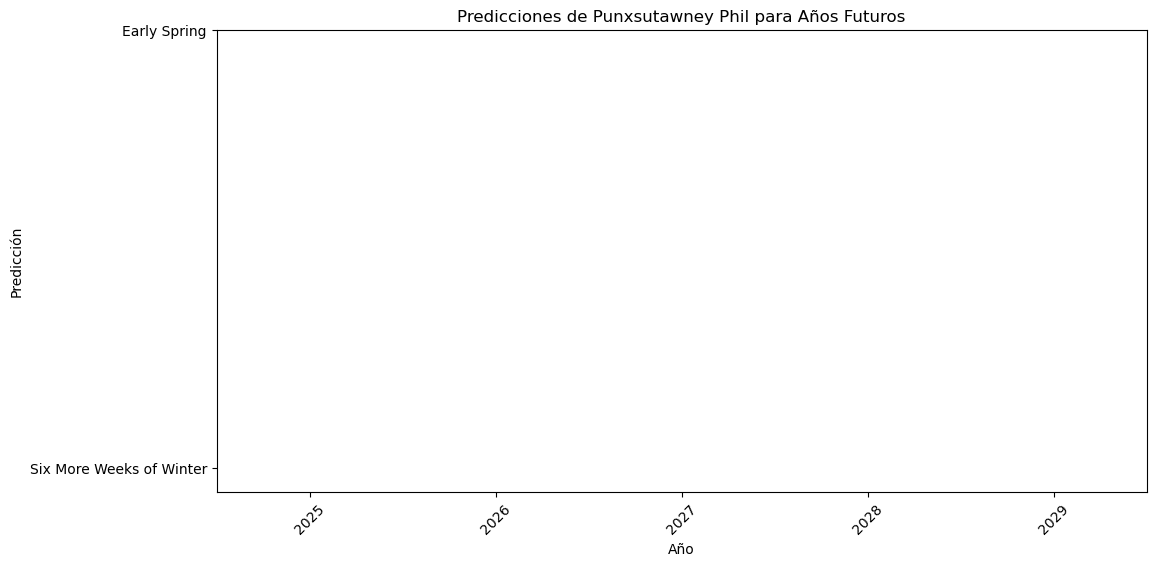

In [42]:

# Crear un DataFrame con los datos futuros
df_future = pd.DataFrame(data_future)

# Agregar las predicciones al DataFrame
df_future["Phil_Prediction"] = future_predictions
df_future["Phil_Prediction"] = df_future["Phil_Prediction"].map({0: "Early Spring",1: "Six More Weeks of Winter"})

# Ordenar por año para mejor visualización
df_future = df_future.sort_values(by="Year")

# Configurar la figura
plt.figure(figsize=(12, 6))

# Graficar las predicciones futuras
sns.barplot(x=df_future["Year"], y=df_future["Phil_Prediction"].astype("category").cat.codes, palette="coolwarm")

# Personalizar gráfico
plt.title("Predicciones de Punxsutawney Phil para Años Futuros")
plt.xlabel("Año")
plt.ylabel("Predicción")
plt.yticks([0, 1], ["Six More Weeks of Winter", "Early Spring"])  # Etiquetas correctas en eje Y
plt.xticks(rotation=45)  # Rotar etiquetas del eje X

# Mostrar gráfico
plt.show()


In [ ]:
df_future.to_csv('Analysis_of_Groundhog_Day_future.csv', index=False)

In [80]:
data_balanced['Phil_Accuracy'] =data_balanced['Year'].apply(lambda x: 0.24 if x >= 1990 else np.nan) 

In [82]:
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Year                                         206 non-null    int32  
 1   February Average Temperature                 206 non-null    float64
 2   February Average Temperature (Northeast)     206 non-null    float64
 3   February Average Temperature (Midwest)       206 non-null    float64
 4   February Average Temperature (Pennsylvania)  206 non-null    float64
 5   March Average Temperature                    206 non-null    float64
 6   March Average Temperature (Northeast)        206 non-null    float64
 7   March Average Temperature (Midwest)          206 non-null    float64
 8   March Average Temperature (Pennsylvania)     206 non-null    float64
 9   Phil_Prediction                              206 non-null    float64
 10  Ph

In [86]:
target1=data_balanced["Phil_Prediction"]
features1 = data_balanced.drop(['Phil_Prediction'], axis=1)

In [88]:
features_train, features_valid, target_train, target_valid = train_test_split(features1, target1, test_size=0.2, random_state=12345)

print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)

(164, 10)
(164,)
(42, 10)
(42,)


In [90]:
print(features_train.columns)

Index(['Year', 'February Average Temperature',
       'February Average Temperature (Northeast)',
       'February Average Temperature (Midwest)',
       'February Average Temperature (Pennsylvania)',
       'March Average Temperature', 'March Average Temperature (Northeast)',
       'March Average Temperature (Midwest)',
       'March Average Temperature (Pennsylvania)', 'Phil_Accuracy'],
      dtype='object')


In [98]:
# Entrenar el modelo XGBoost
model_XGB = xgb.XGBClassifier(random_state=12345, scale_pos_weight=1, eval_metric='logloss')
model_XGB.fit(features_train,target_train)

# Predecir en el conjunto de validación
predicted_valid_XGB = model_XGB.predict(features_valid)

In [100]:
accuracy = accuracy_score(target_valid, predicted_valid_XGB)
precision = precision_score(target_valid, predicted_valid_XGB)
recall = recall_score(target_valid, predicted_valid_XGB)
f1 = f1_score(target_valid, predicted_valid_XGB)
auc_roc = roc_auc_score(target_valid, predicted_valid_XGB)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.8571
Precision: 0.7600
Recall: 1.0000
F1-Score: 0.8636
AUC-ROC: 0.8696


In [102]:
print(f"Phil's Historical Accuracy: 0.24")
print(f"Model's Accuracy: {accuracy:.4f}")

Phil's Historical Accuracy: 0.24
Model's Accuracy: 0.8571


Phil's Historical Accuracy: 0.24
Model's Accuracy: 0.8571


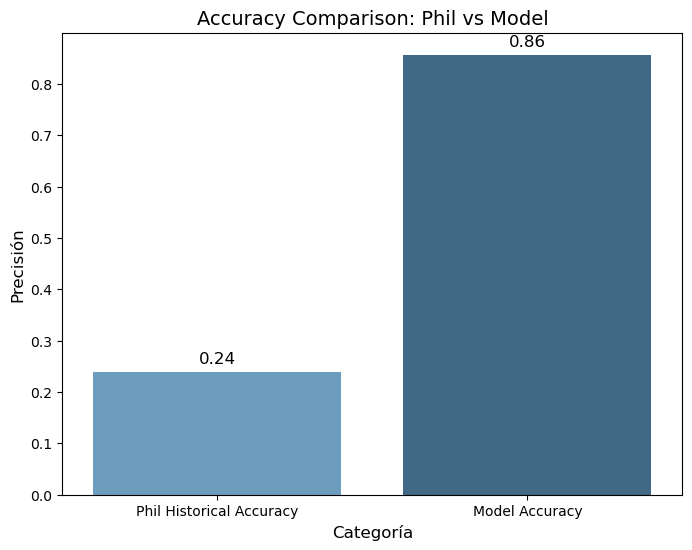

In [112]:

# Precisión histórica de Phil y la precisión del modelo
phils_accuracy = 0.24
model_accuracy = 0.8571

# Imprimir las precisiones
print(f"Phil's Historical Accuracy: {phils_accuracy}")
print(f"Model's Accuracy: {model_accuracy:.4f}")

# Datos para graficar
labels = ['Phil Historical Accuracy', 'Model Accuracy']
accuracy_values = [phils_accuracy, model_accuracy]

# Crear un DataFrame para el gráfico
data = pd.DataFrame({'Label': labels, 'Accuracy': accuracy_values})

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Label', y='Accuracy', data=data, palette='Blues_d')

# Anotar los valores sobre las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       fontsize=12, color='black', 
                       xytext=(0, 9), textcoords='offset points')

# Títulos y etiquetas
plt.title('Accuracy Comparison: Phil vs Model', fontsize=14)
plt.ylabel('Precisión', fontsize=12)
plt.xlabel('Categoría', fontsize=12)

# Mostrar el gráfico
plt.show()
